# Predict Stock Price

Try to predict the downward and upward trend of Google stock price.

## Get Data

In [0]:
import requests
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train_data_url = 'https://raw.githubusercontent.com/MarkIChen/RNN/master/dataset/Google_Stock_Price_Train.csv'
test_data_url = 'https://raw.githubusercontent.com/MarkIChen/RNN/master/dataset/Google_Stock_Price_Test.csv'
train_data = pd.read_csv(train_data_url)
test_data = pd.read_csv(test_data_url)

In [85]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [86]:
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


## Prepare for training dataset

In [0]:
training_set = train_data.iloc[:, 1:2].values
# values will transform panda into a numpy array

In [88]:
train_data.shape, training_set.shape

((1258, 6), (1258, 1))

## Feature scaling

![alt text](https://github.com/MarkIChen/RNN/blob/master/img/Feature-Scaling.png?raw=true)

When there is a sigmoid function as a activation layer, we should use normalization.

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))

In [0]:
training_set_scaled = sc.fit_transform(training_set)

In [91]:
training_set_scaled.shape

(1258, 1)

## Create a data structure to store timesteps

Now, we will predict the ouput based on privious 60 day data.

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, training_set_scaled.shape[0]-1):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [94]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,0.024090,0.015924,0.010789,0.009673,0.016426,0.021002,0.022807,0.022732,0.028108,0.032127,0.043381,0.044758,0.047902,0.044069,0.046488,0.047455,0.048739,0.039363,0.041372,0.040349,0.047846,0.043251,0.043567,0.042860,0.046023,0.053985,0.057389,0.057147,0.055696,0.044218,0.045148,0.046060,0.044125,0.036759,0.044869,0.050655,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838


In [95]:
pd.DataFrame(y_train).head(5)

,0
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383


## Reshaping

- Keras Recurrent Layers doc: 
3D tensor with shape (batch_size, timesteps, input_dim)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [97]:
X_train.shape

(1197, 60, 1)

## Build a RNN Model

In [0]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
# To predict a continue value, we will use regression.
regressor = Sequential()

In [0]:
# The first Layer
regressor.add(LSTM(units= 50, return_sequences= True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [0]:
# The second Layer
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [0]:
# The third Layer
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))

In [0]:
# The forth Layer
regressor.add(LSTM(units= 50, return_sequences= False))
regressor.add(Dropout(0.2))

In [0]:
# the output layer
regressor.add(Dense(units=1))

## Compile the model with arguments

In [0]:
regressor.compile(optimizer='adam', loss= 'mean_squared_error')

## Train the model with data

In [107]:
regressor.fit(X_train, y_train, epochs= 100, batch_size= 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1197/1197 [==============================] - 13s 10ms/step - loss: 0.0624
Epoch 2/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0067
Epoch 3/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0054
Epoch 4/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0056
Epoch 5/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0053
Epoch 6/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 7/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0052
Epoch 8/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0050
Epoch 9/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 10/100
1197/1197 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 11/100
1197/1197 [==============================] - 8s 7m

## Test the model

In [0]:
real_stock_price = test_data.iloc[:, 1:2].values

In [0]:
data_total = pd.concat((train_data['Open'], test_data['Open']), axis= 0)
inputs = data_total[len(data_total)-len(test_data) - 60 : ].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [114]:
inputs.shape

(80, 1)

In [0]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60: i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [117]:
predicted_stock_price

array([[773.4313 ],
       [770.8076 ],
       [770.5758 ],
       [771.7064 ],
       [774.8762 ],
       [780.64056],
       [786.45575],
       [789.54395],
       [790.3976 ],
       [790.0763 ],
       [789.3772 ],
       [788.6126 ],
       [788.03546],
       [788.2486 ],
       [789.0891 ],
       [793.2614 ],
       [800.02905],
       [807.80176],
       [812.8544 ],
       [810.2513 ]], dtype=float32)

## Visualization

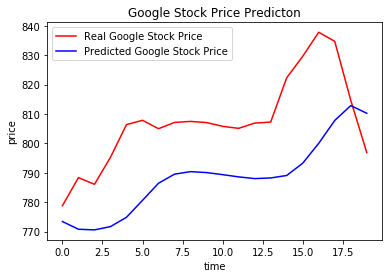

In [118]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Predicton')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()